In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

In [44]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/entropy-4800/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/entropy-4800/



/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,ActionsAdvantageMean,ActionsClipFrac,ActionsEntropy,ActionsKL,ActionsReward,ActionsStopIter,ActionsVVals,AverageEpRet,AverageVVals,ClipFrac,...,RewardDiscount,StabilityActionError,StabilityGoalError,StabilityReward,StdEpRet,StdVVals,StopIter,Time,TotalEnvInteracts,Unit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1518.6058,-1.814622,0.050625,...,NaN,NaN,NaN,NaN,73.178700,0.657620,79.0,3.748004,4800,50
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1522.6782,-24.271576,0.024583,...,NaN,NaN,NaN,NaN,77.219180,7.729524,79.0,7.481506,9600,50
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1520.4767,-110.192184,0.024167,...,NaN,NaN,NaN,NaN,58.212658,35.376266,79.0,10.762256,14400,50
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1553.2689,-277.426180,0.055208,...,NaN,NaN,NaN,NaN,70.749230,81.118324,79.0,13.296489,19200,50
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1486.3744,-369.419220,0.031667,...,NaN,NaN,NaN,NaN,82.896736,124.015686,79.0,16.501096,24000,50
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1519.8217,-390.886800,0.043125,...,NaN,NaN,NaN,NaN,86.279884,108.331260,79.0,19.472241,28800,50
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1553.6338,-423.600980,0.031875,...,NaN,NaN,NaN,NaN,61.673664,91.669380,79.0,21.463571,33600,50
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1543.5873,-432.578430,0.036875,...,NaN,NaN,NaN,NaN,62.350810,99.320100,79.0,22.913613,38400,50
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1486.7803,-417.321470,0.034167,...,NaN,NaN,NaN,NaN,100.865050,120.975740,79.0,25.512896,43200,50
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1486.9180,-397.018070,0.052500,...,NaN,NaN,NaN,NaN,64.040600,108.043380,79.0,28.571389,48000,50


In [45]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#            'goal_octaves', 
#            'goal_discount_rate', 
#            'no_step_reward', 
#            'forward_error_for_curiosity_reward',
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch
0,entropy-ppo_pendulum-v0_0-05,4800
10,entropy-actions-05_pendulum-v0,4800
17,entropy-0_pendulum-v0,4800
23,entropy-goals-05_pendulum-v0,4800
40,entropy-goals-actions-05_pendulum-v0,4800
47,entropy-ppo_pendulum-v0_0-0,4800


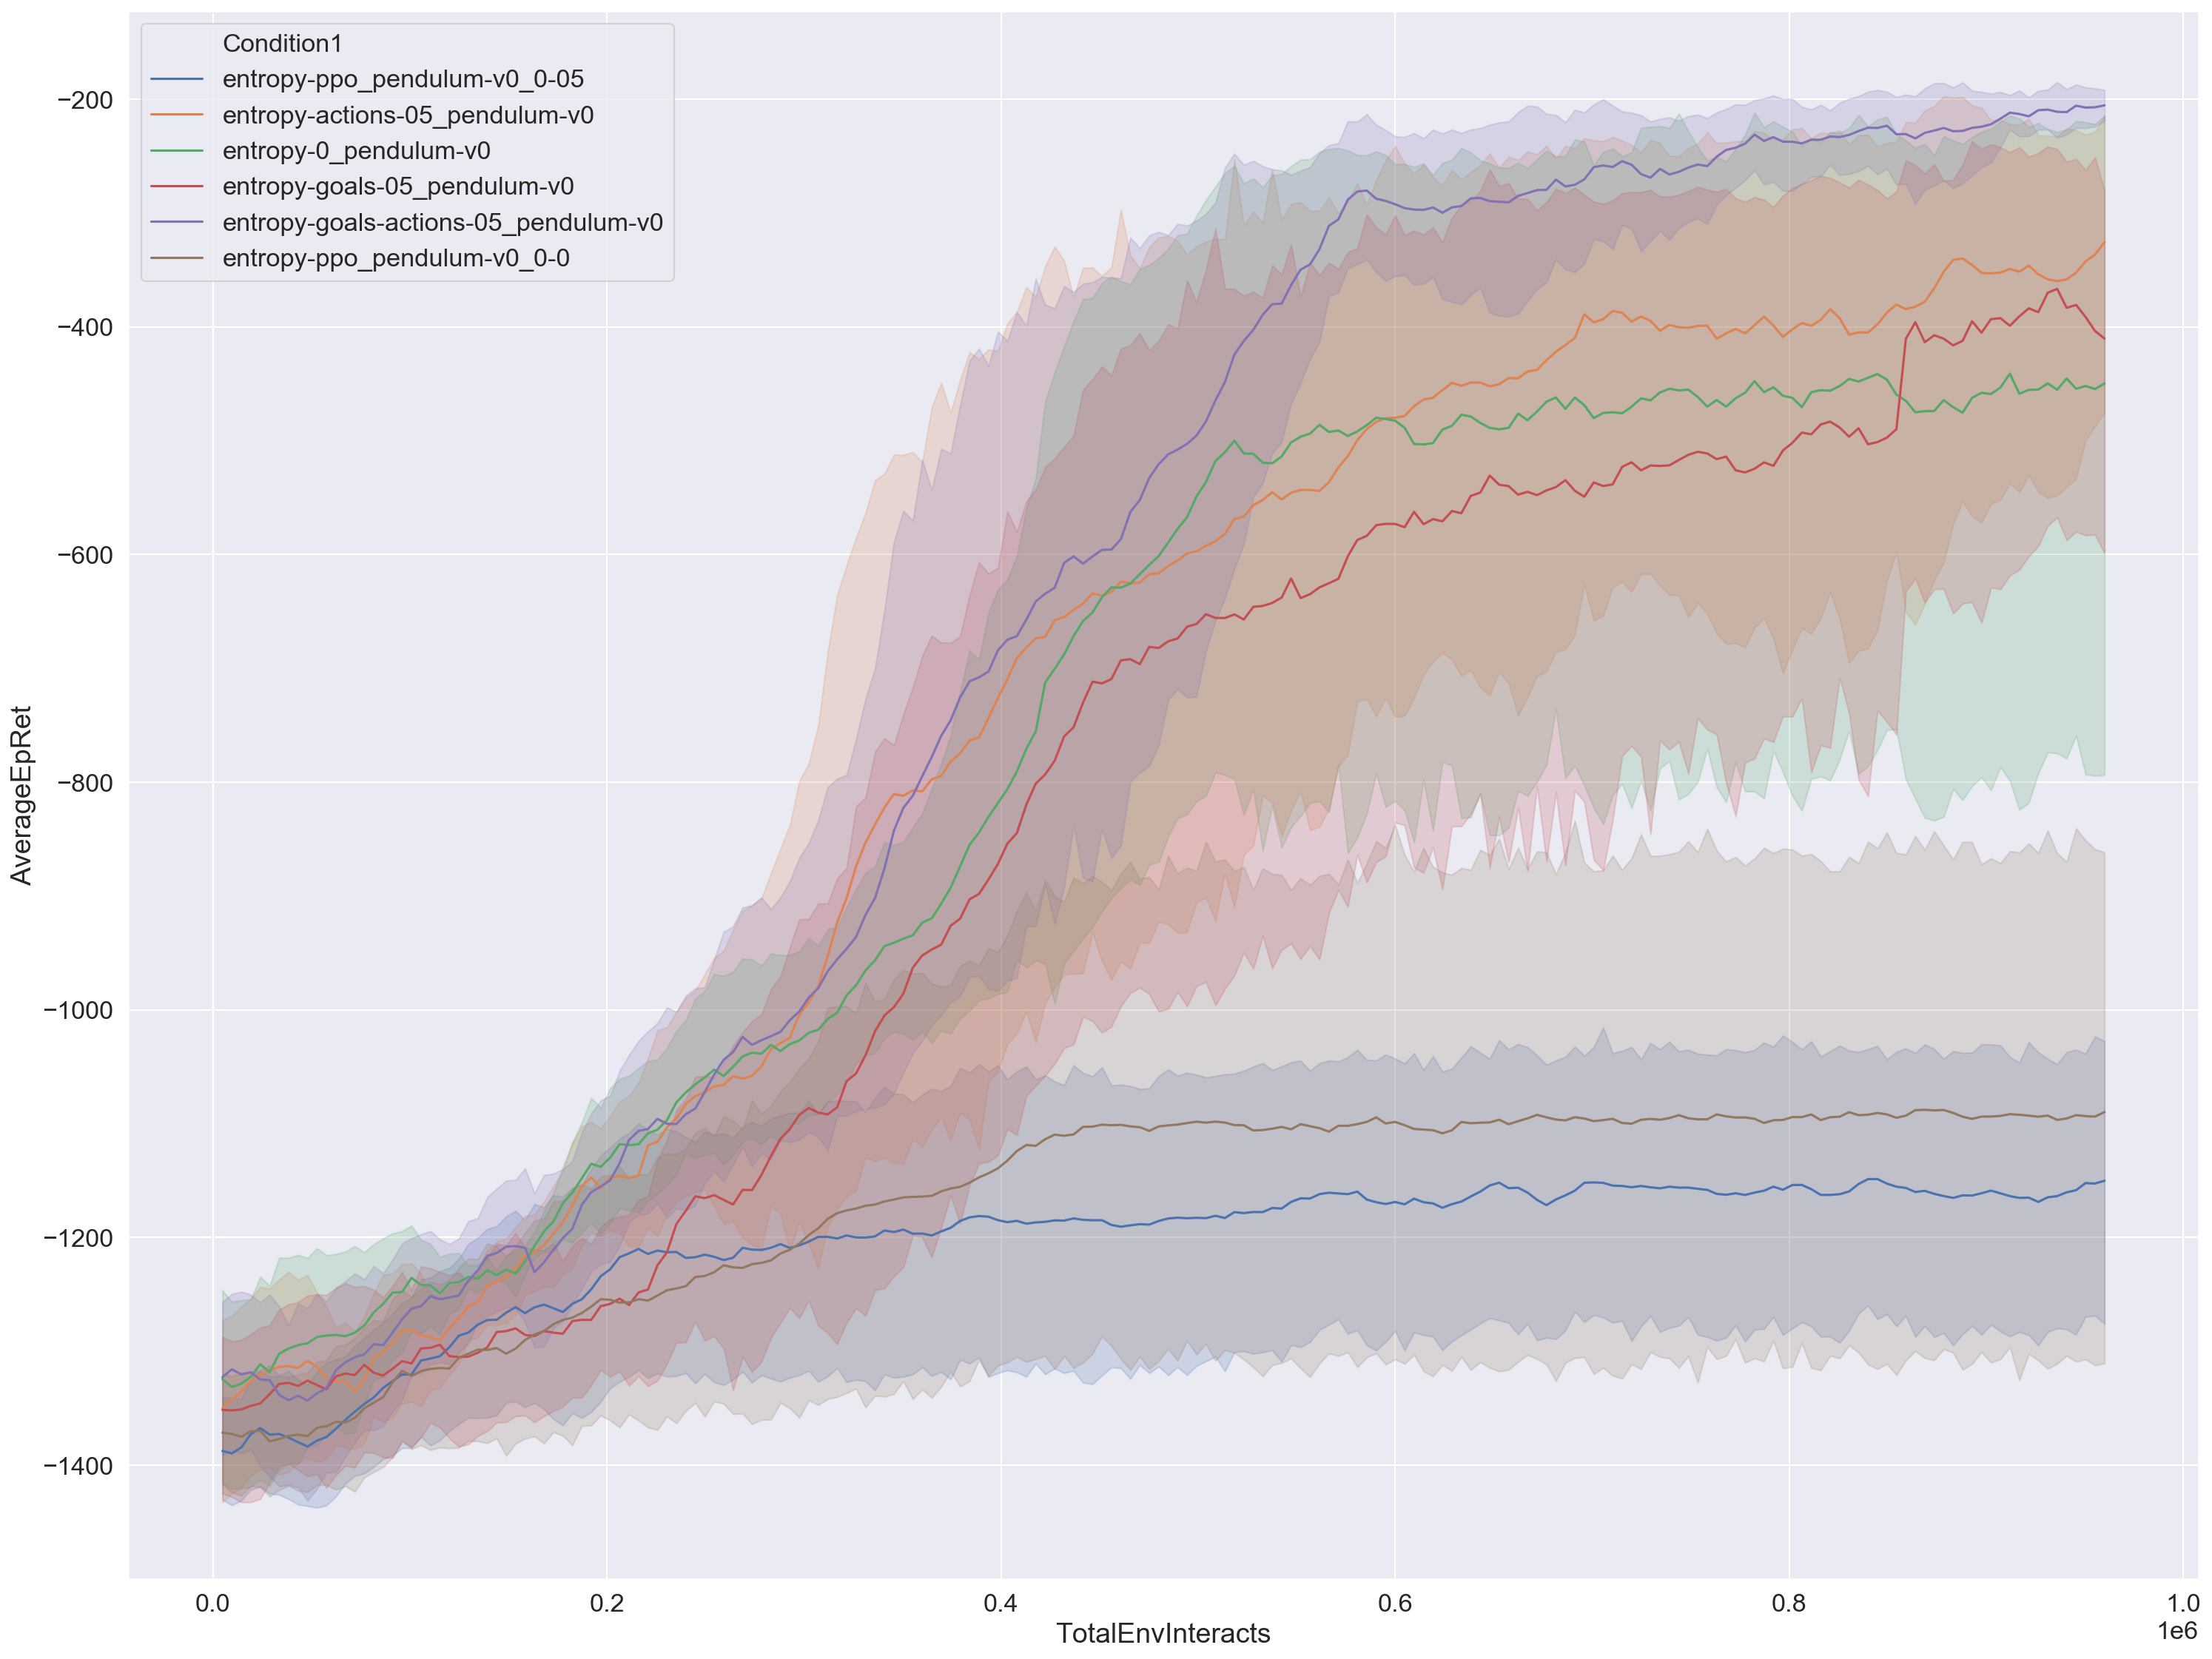

In [46]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5, xaxis='TotalEnvInteracts')
plt.show()

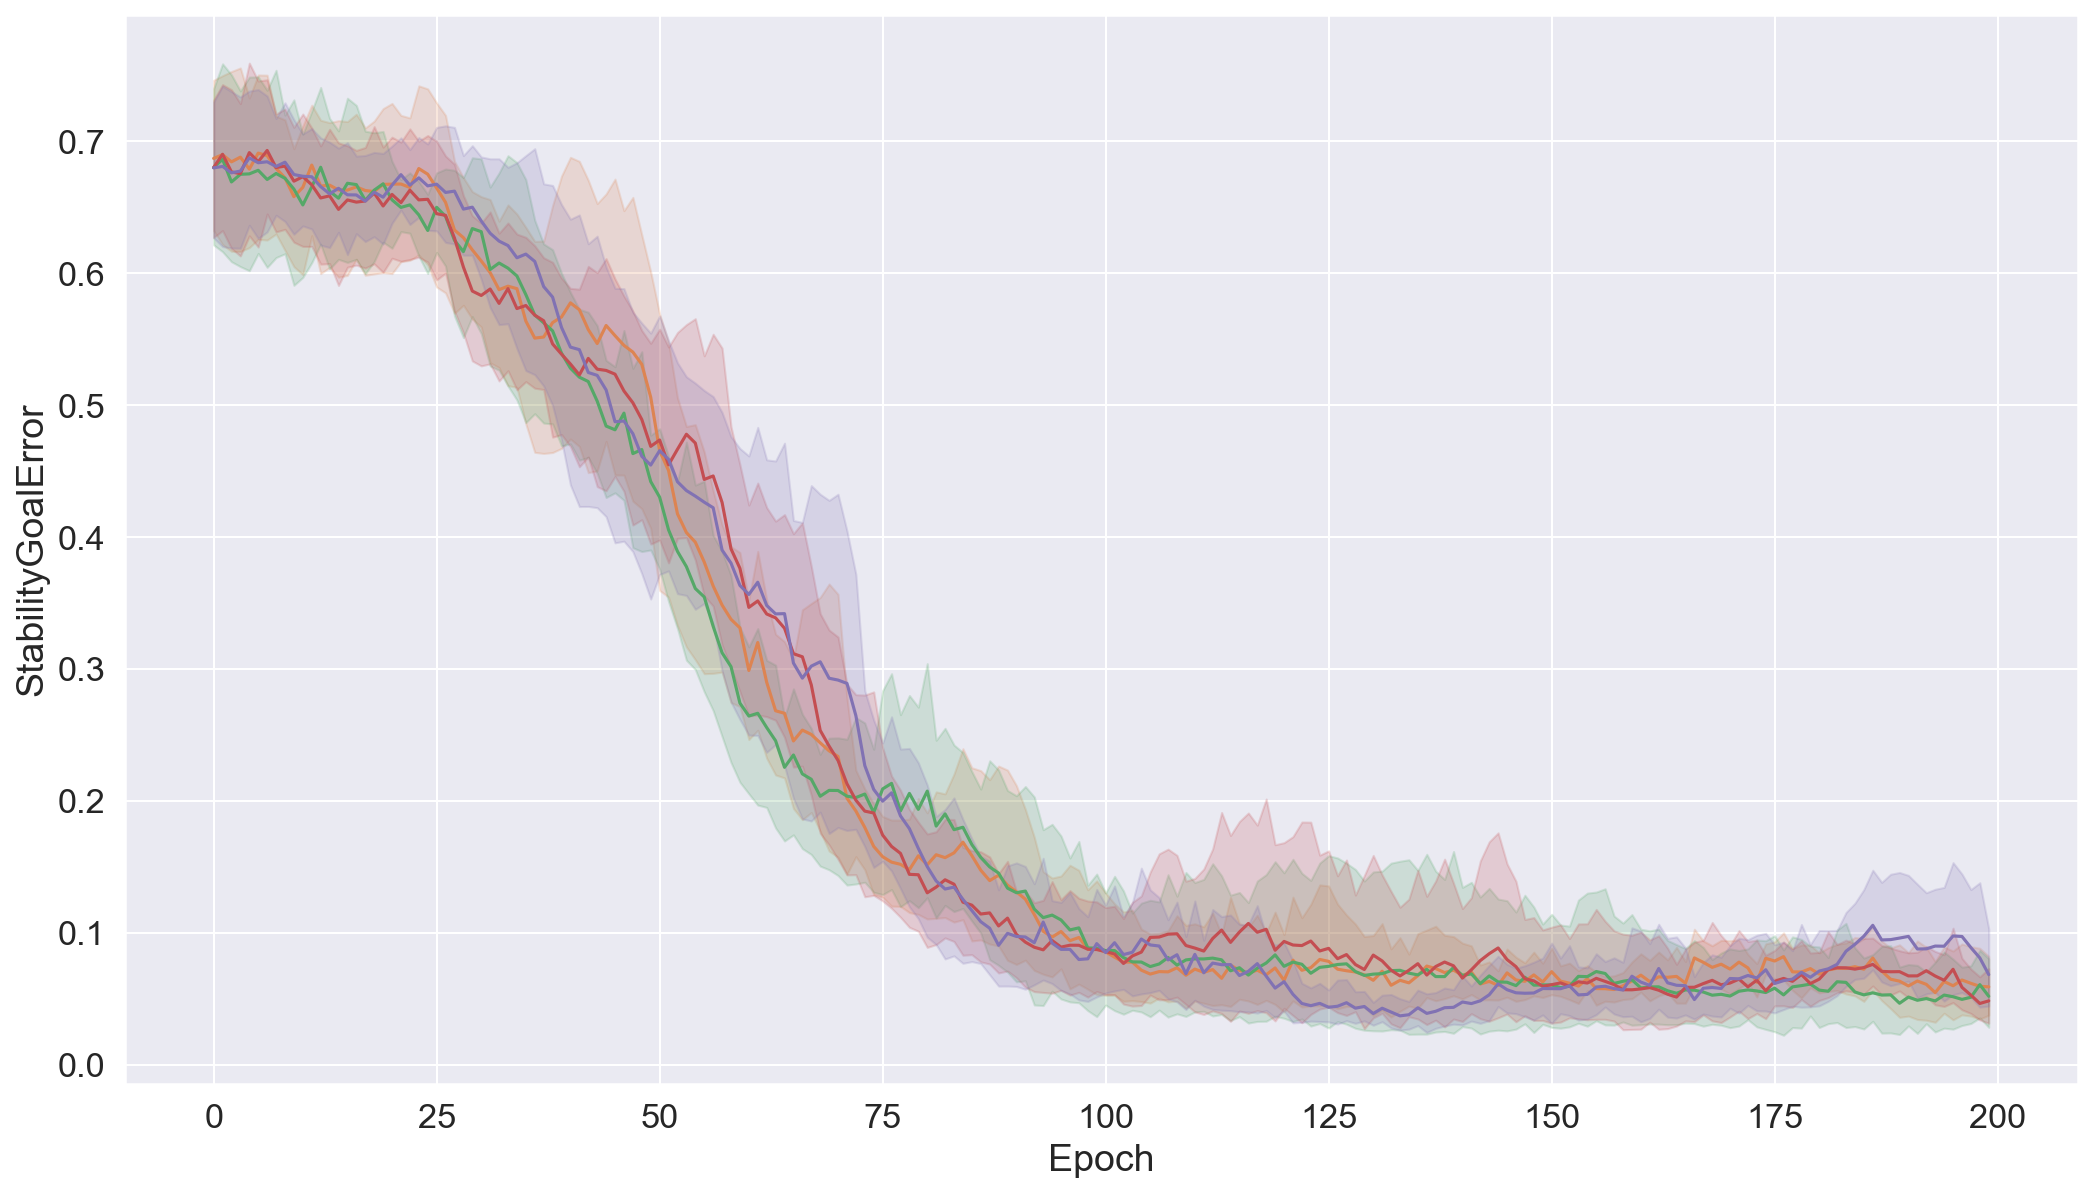

In [47]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

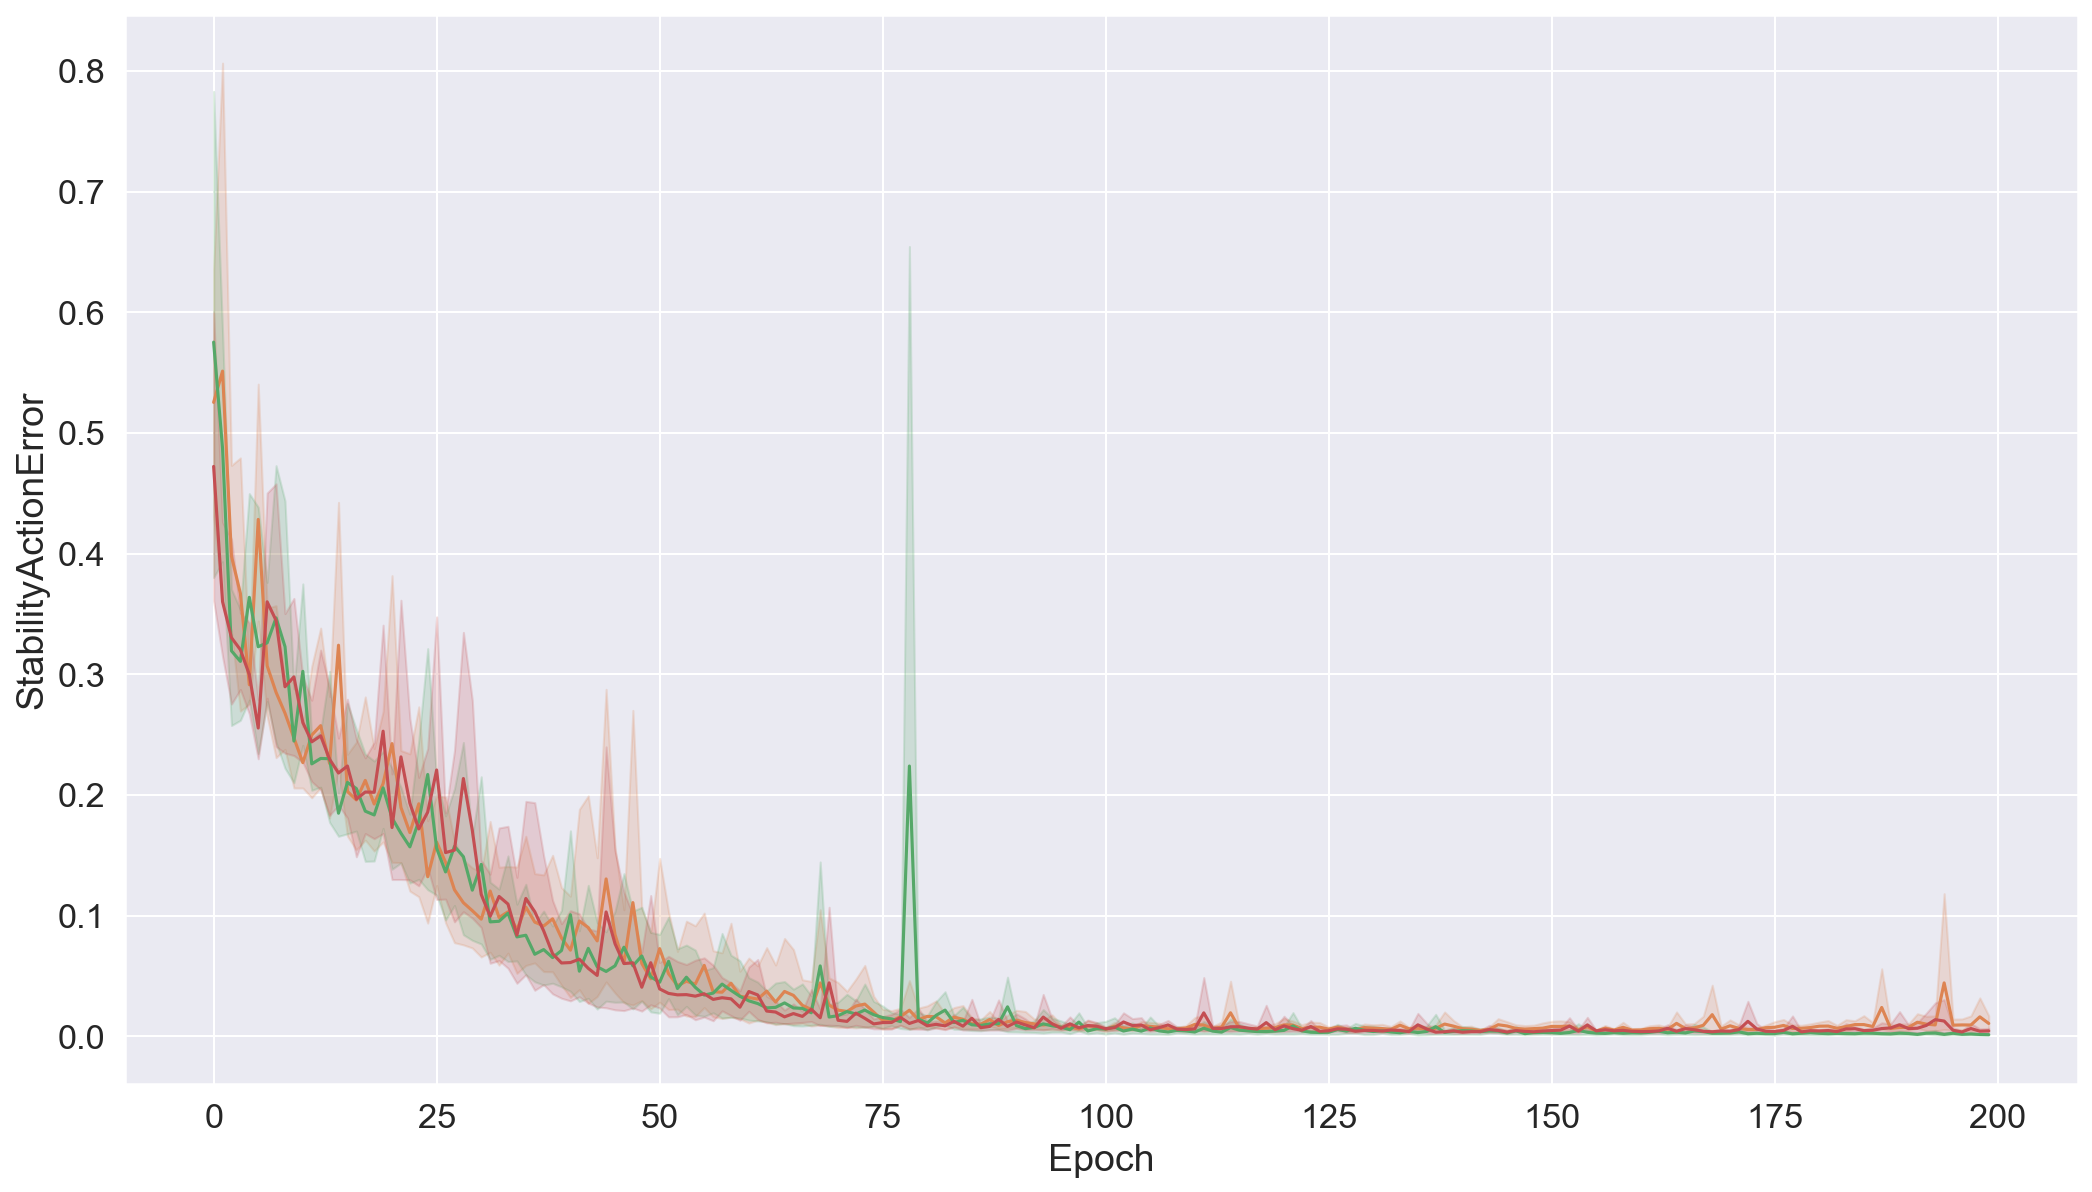

In [39]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False)
plt.show()

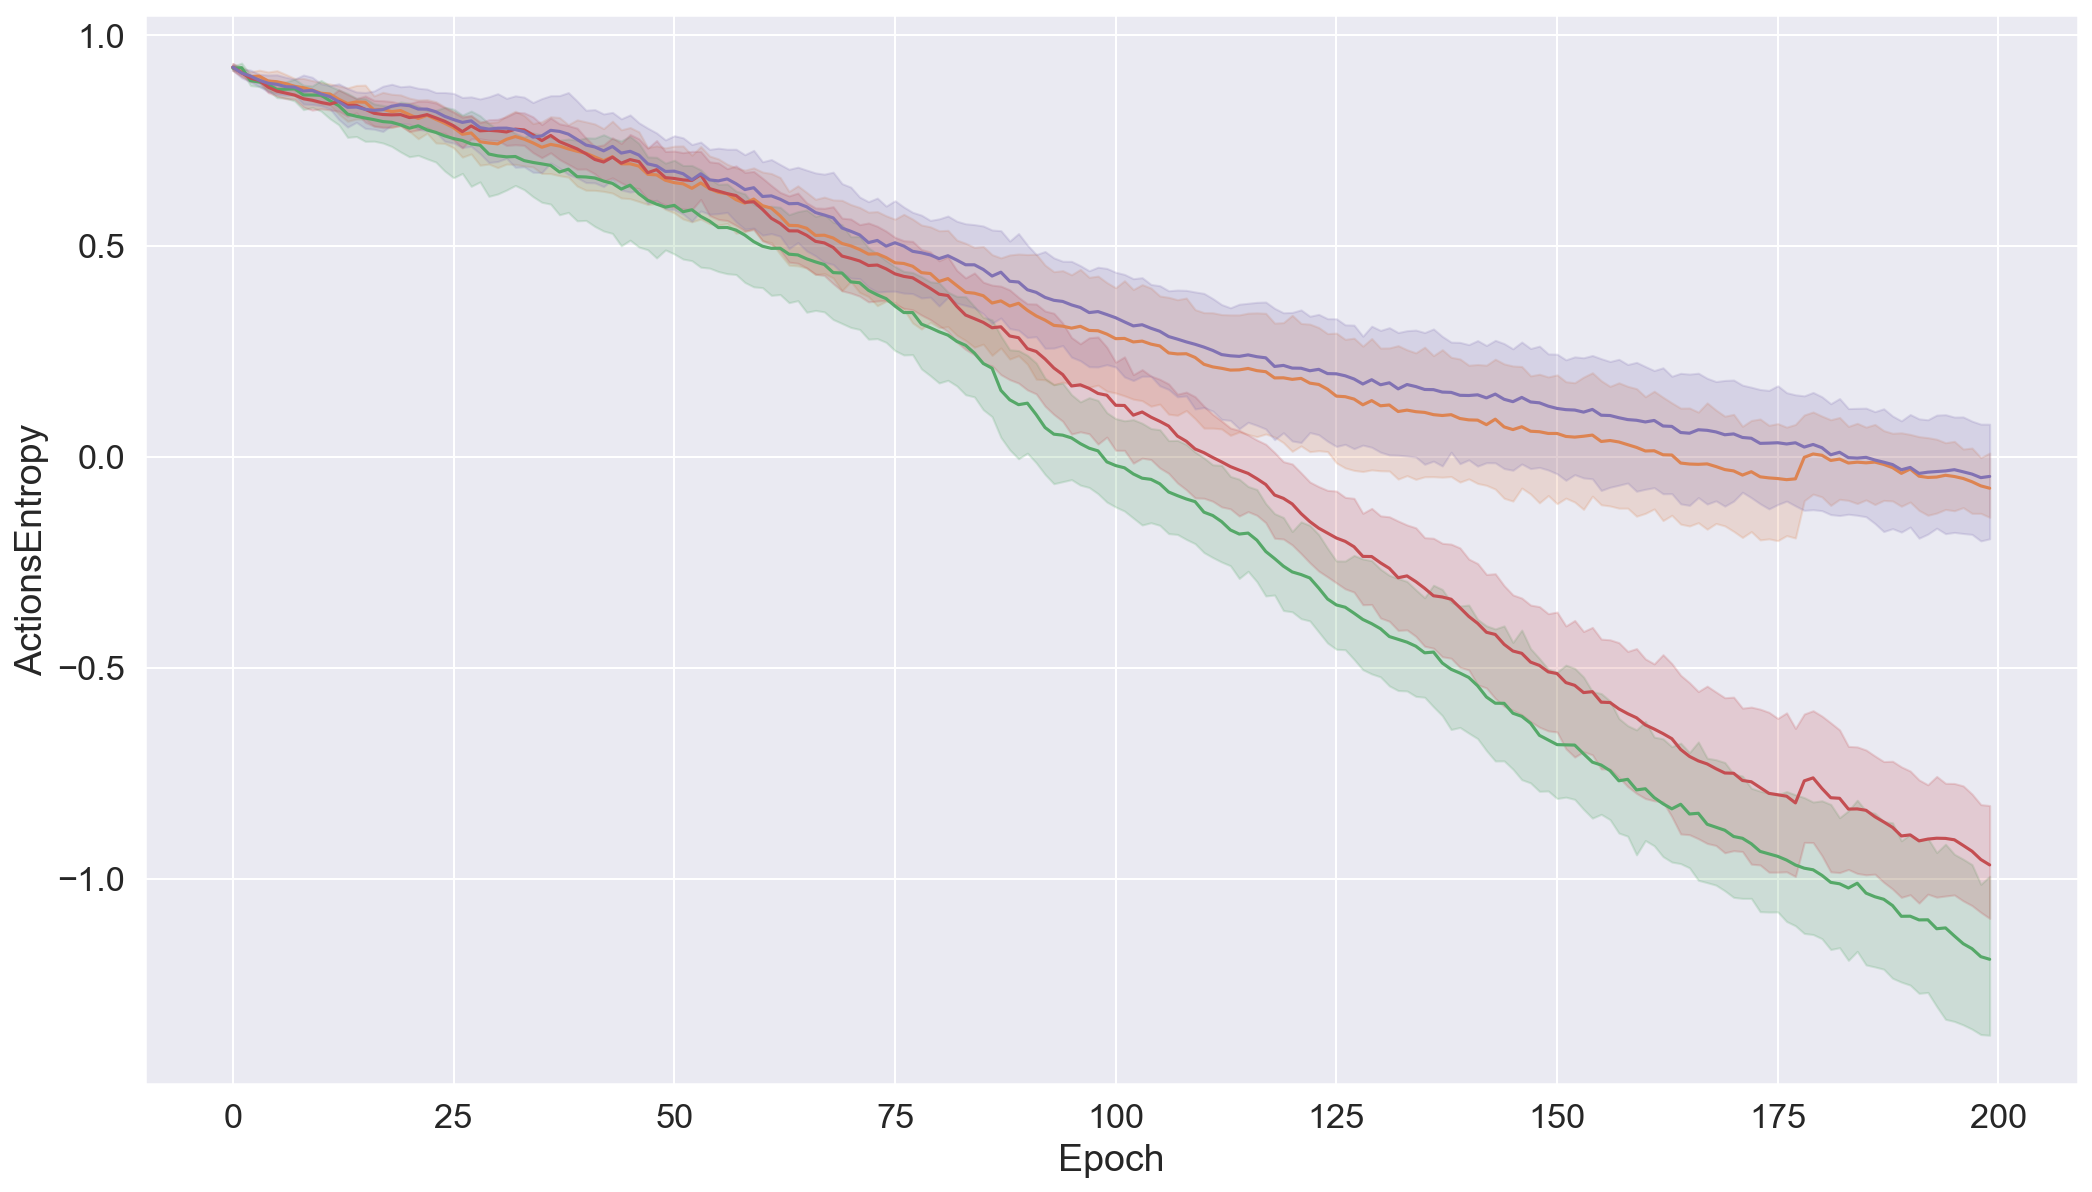

In [48]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

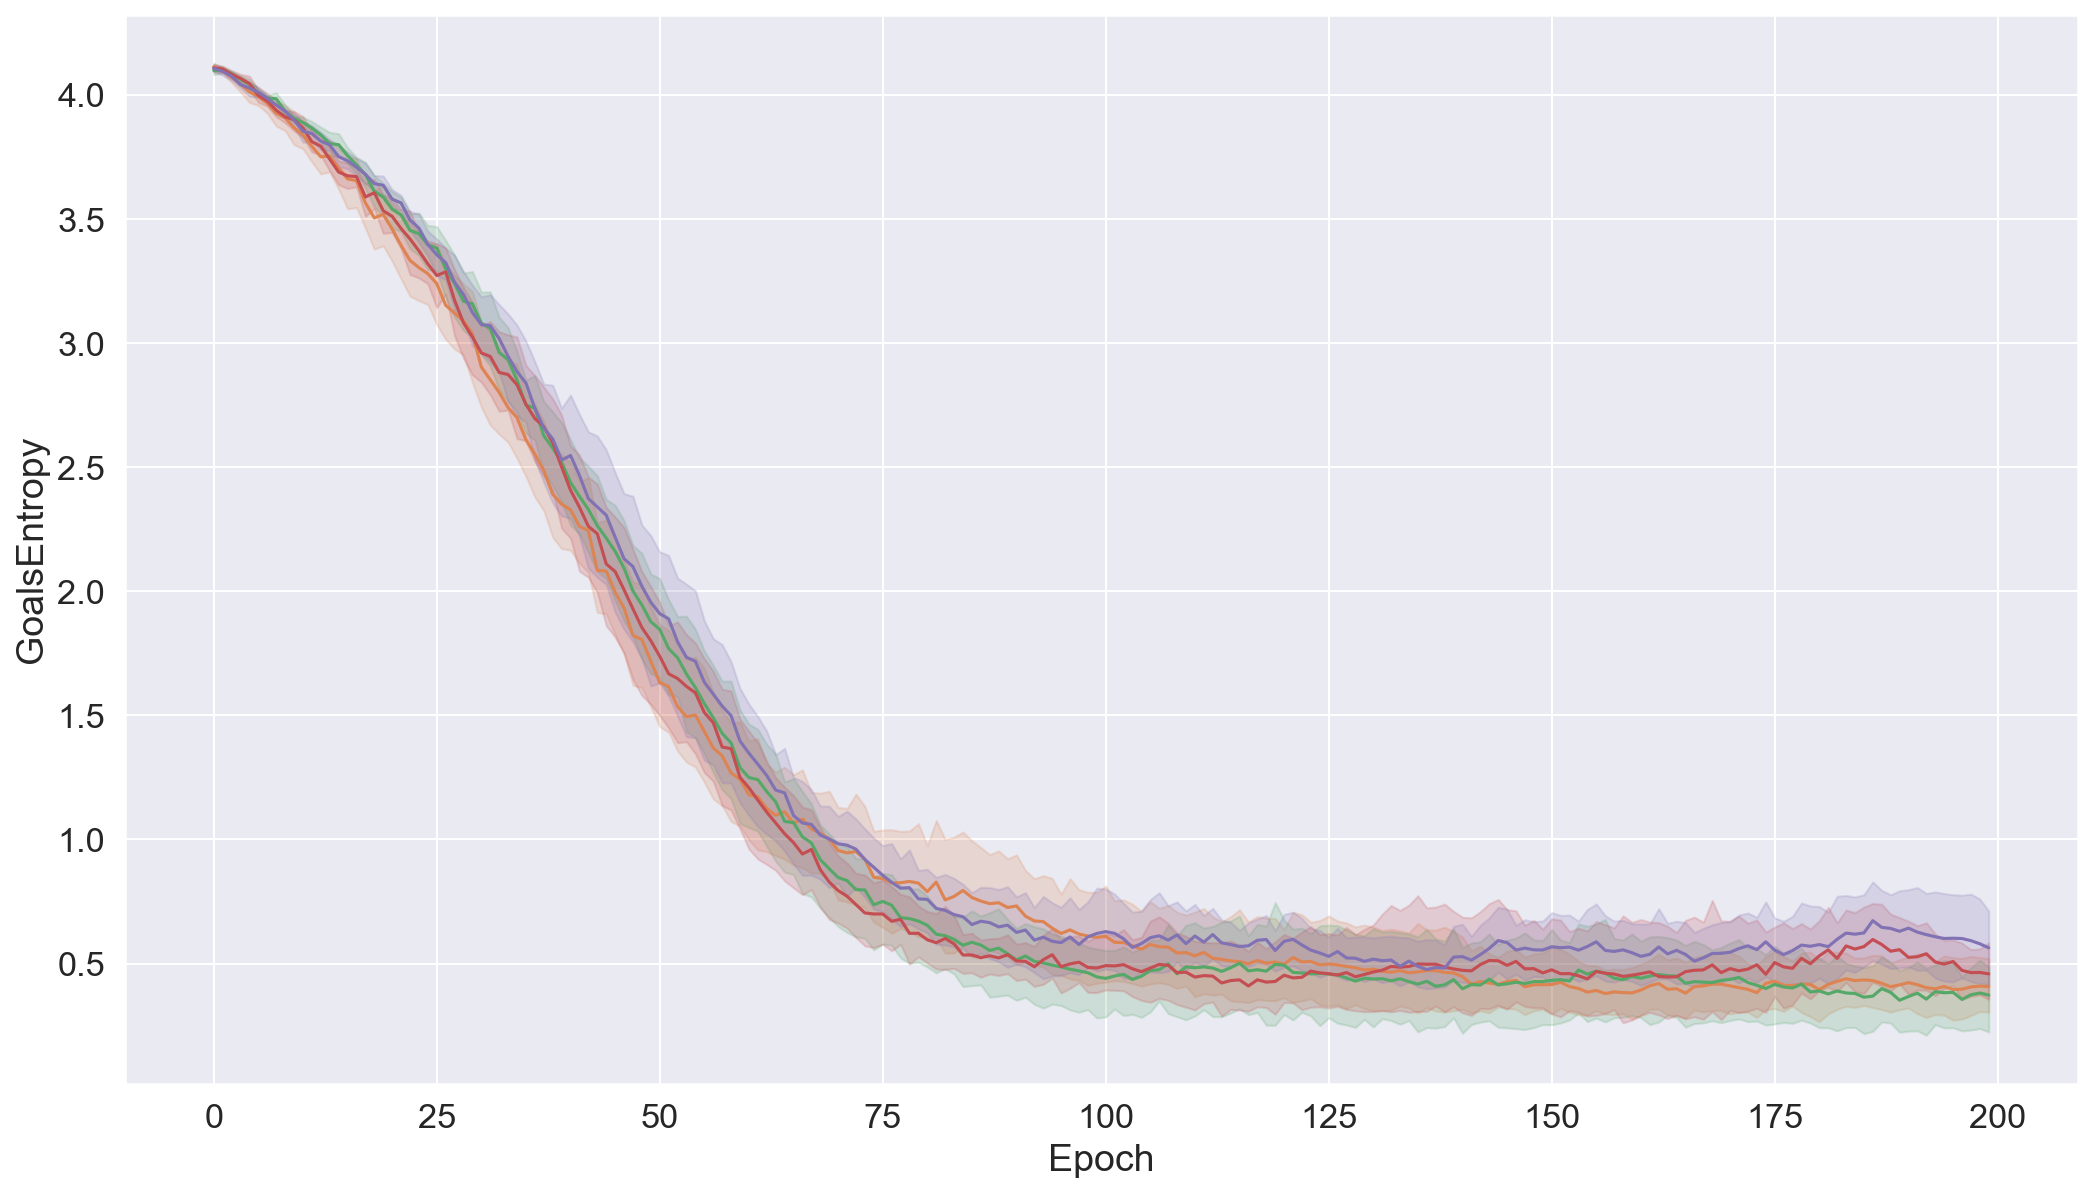

In [50]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()

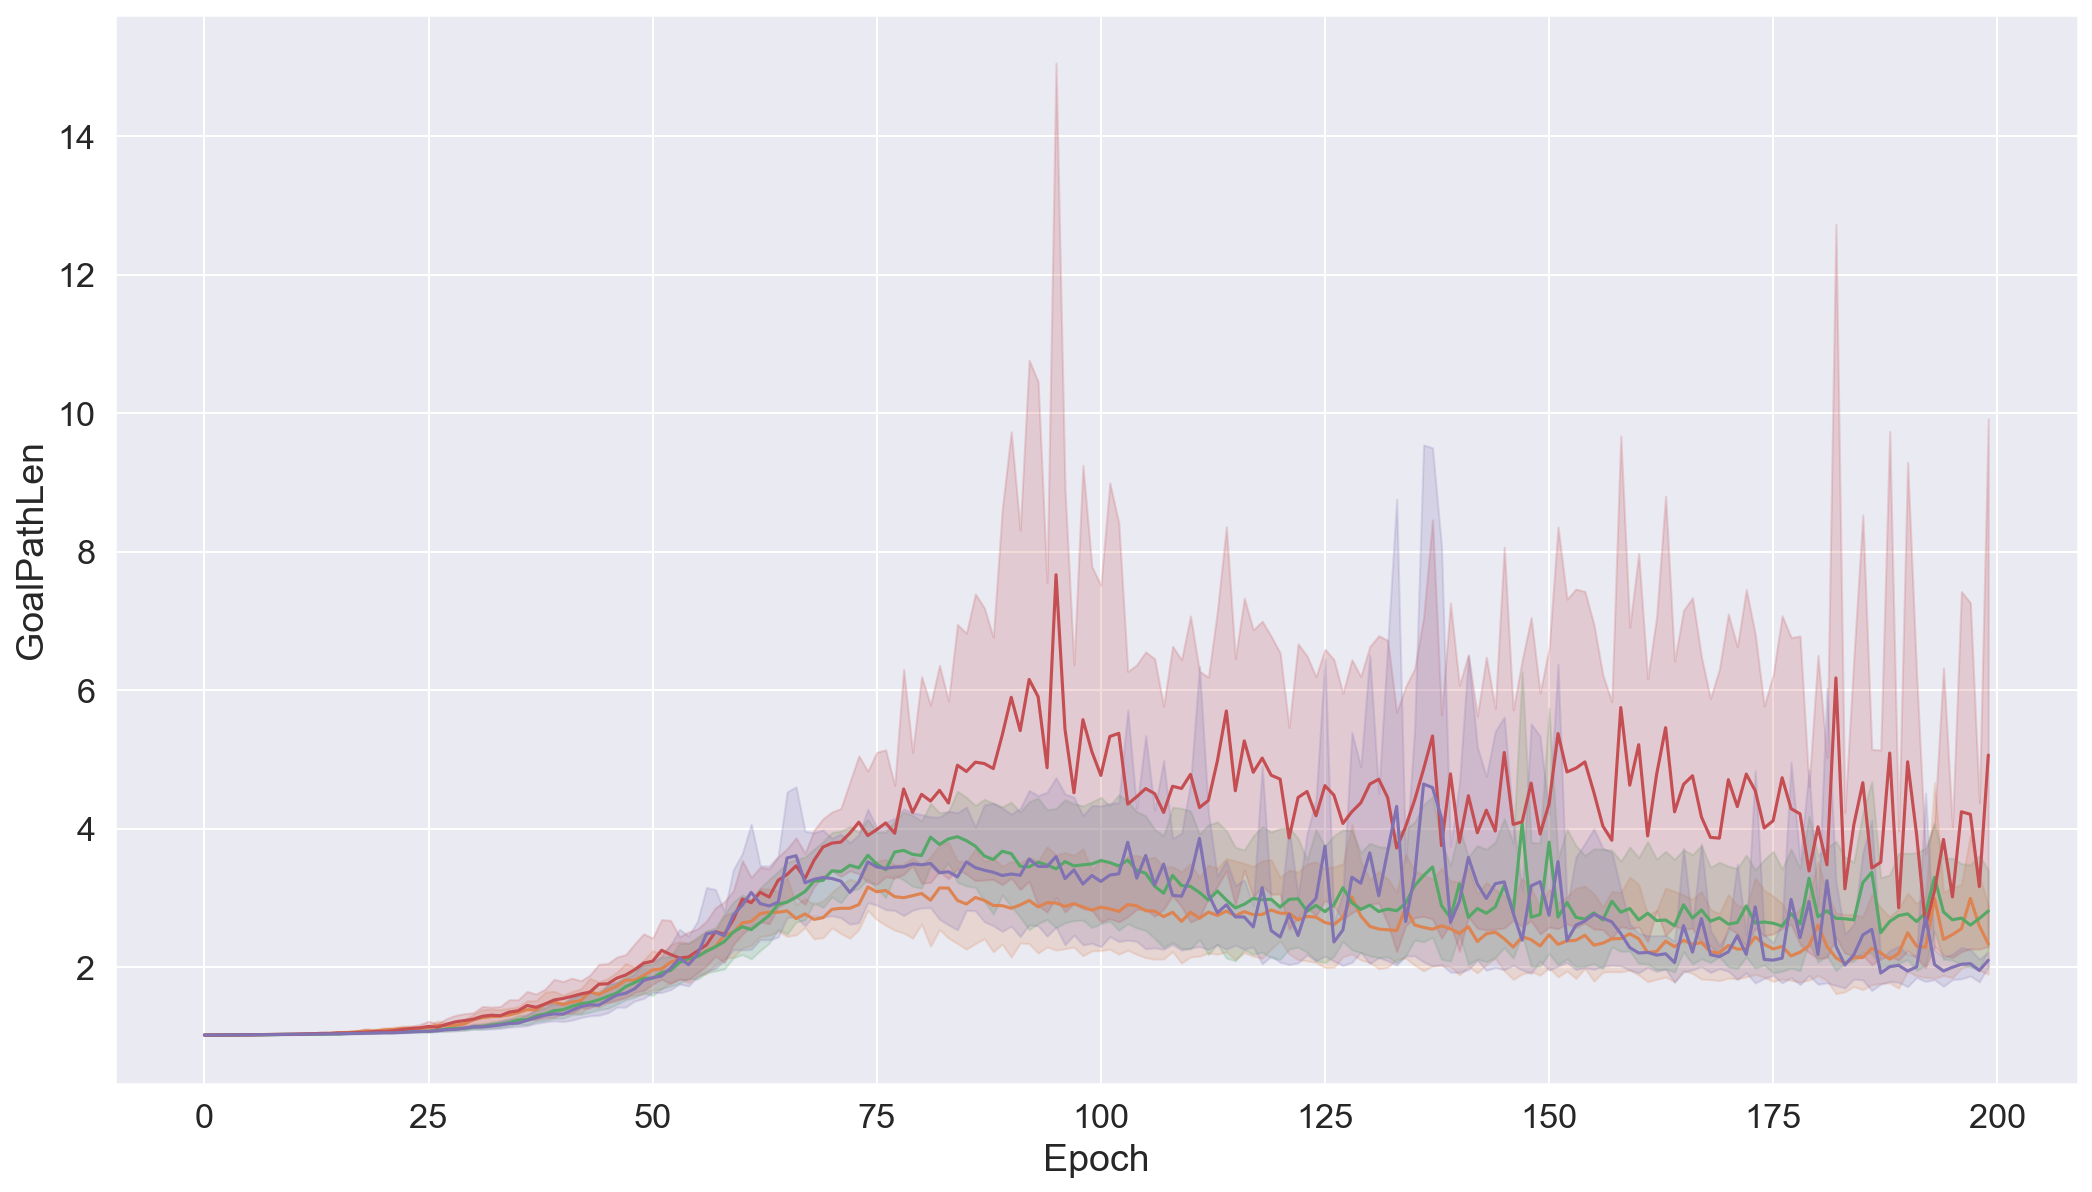

In [49]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalPathLen', smooth=1, show_legend=False)
plt.show()